## Main Task
We aim to uncover long-term trends, seasonal patterns, and anomalies in India's rainfall data!  
The key objectives include analyzing historical rainfall data to uncover patterns and trends, detecting years or months with anomalous rainfall behavior, and exploring the relationships between seasonal and annual rainfall.

### Data Understanding
The given dataset spans from 1901 to 2015, which offers a comprehensive view of rainfall patterns across the country. It provides detailed monthly rainfall data, seasonal aggregations, and annual totals. The dataset is structured to include columns for each month (e.g., January to December), seasonal rainfall (e.g., Monsoon from June to September), and yearly aggregated rainfall figures.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("Dataset/rainfall_area.csv")

In [5]:
dataset.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


### Exploratory Data Analysis
#### What is the overall trend of annual rainfall over the years?

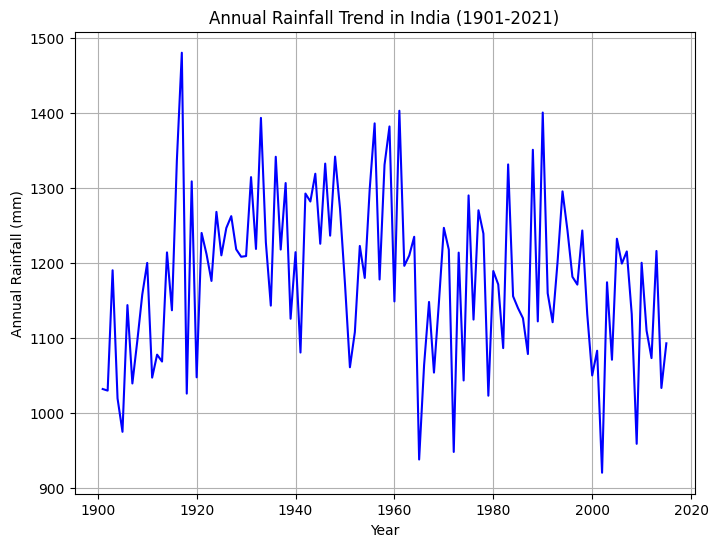

In [10]:
plt.figure(figsize=(8,6))
plt.plot(dataset['YEAR'], dataset['ANNUAL'], linestyle='-', color='blue')
plt.title('Annual Rainfall Trend in India (1901-2021)') 
plt.xlabel('Year') 
plt.ylabel('Annual Rainfall (mm)') 
plt.grid(True) 
plt.show()

> The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. Notable peaks and troughs highlight extreme rainfall events and dry years.

#### What are the monthly rainfall distributions?

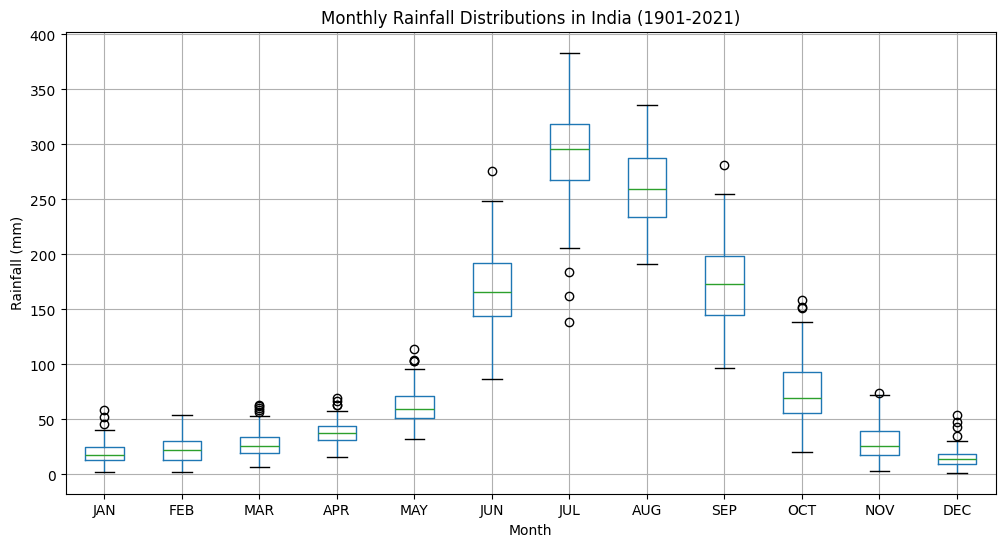

In [11]:
# Creating a dataframe with monthly rainfall columns
monthly_data = dataset[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

# Plotting the box plot
plt.figure(figsize=(12, 6))
monthly_data.boxplot()
plt.title('Monthly Rainfall Distributions in India (1901-2021)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

> The boxplots indicate the increasing trend from January to May makes sense as we move towards the monsoon season. The large number of outliers in March could indicate unusual weather events or variability during that month. June, July, and August having the highest rainfall, with a peak in July, aligns with the typical monsoon season in India. The decrease from September onwards through December shows the transition towards the drier post-monsoon and winter seasons.

#### What are the seasonal rainfall patterns?

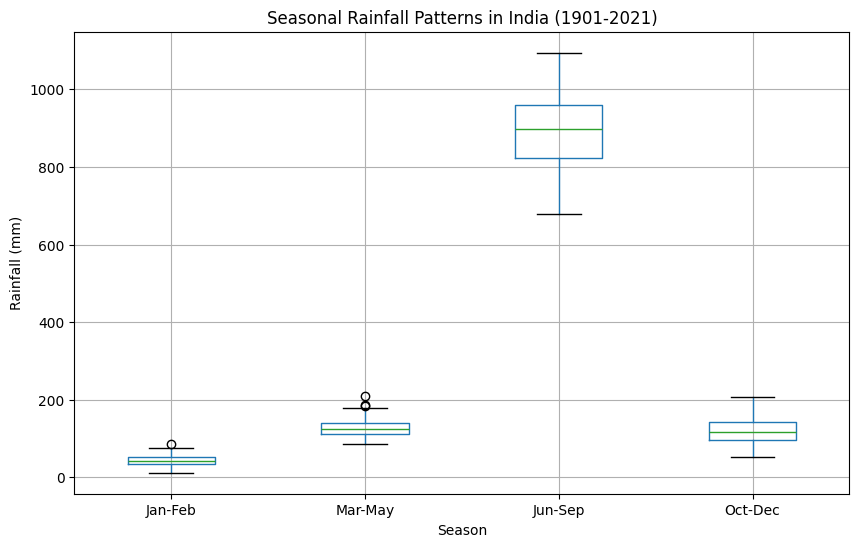

In [12]:
# Creating a dataframe with seasonal rainfall columns
seasonal_data = dataset[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']]
# Plotting the box plot
plt.figure(figsize=(10, 6))
seasonal_data.boxplot()
plt.title('Seasonal Rainfall Patterns in India (1901-2021)')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

> The 'Jun-Sep' period in India corresponds to the monsoon season, The monsoon season is when India receives the majority of its annual rainfall, primarily driven by the southwest monsoon winds.This period typically sees heavy and consistent rainfall, which is crucial for agriculture and water resources in the region.

#### What is average monthly rainfall in India from 1901 to 2021

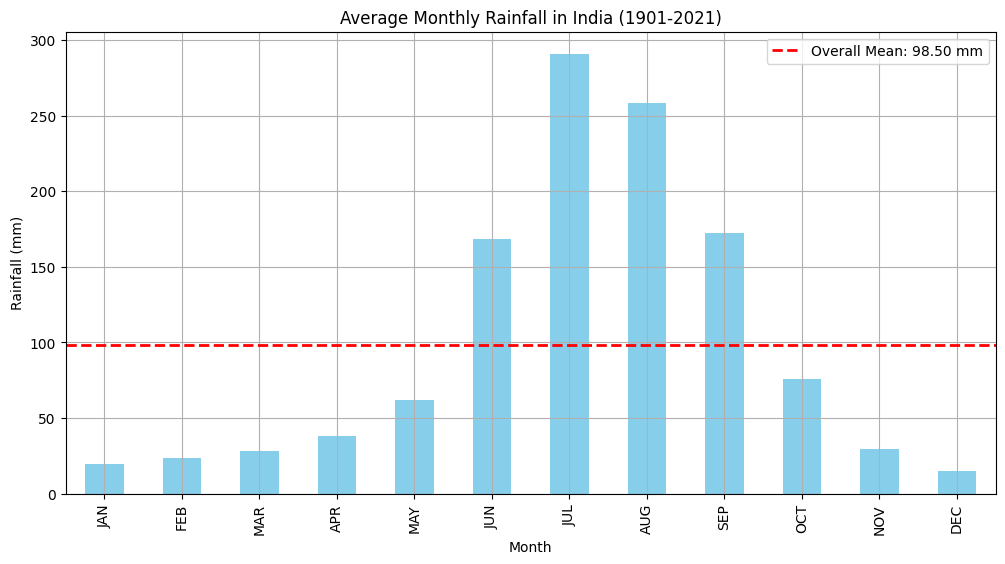

In [14]:
# Calculating the mean rainfall for each month
monthly_mean = dataset[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()

overall_mean = monthly_mean.mean()

# Plotting the average monthly rainfall with the overall mean
plt.figure(figsize=(12, 6))
monthly_mean.plot(kind='bar', color='skyblue')
plt.axhline(y=overall_mean, color='r', linestyle='--', linewidth=2, label=f'Overall Mean: {overall_mean:.2f} mm')
plt.title('Average Monthly Rainfall in India (1901-2021)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

#### Are there any correlations between rainfall in different months or seasons?

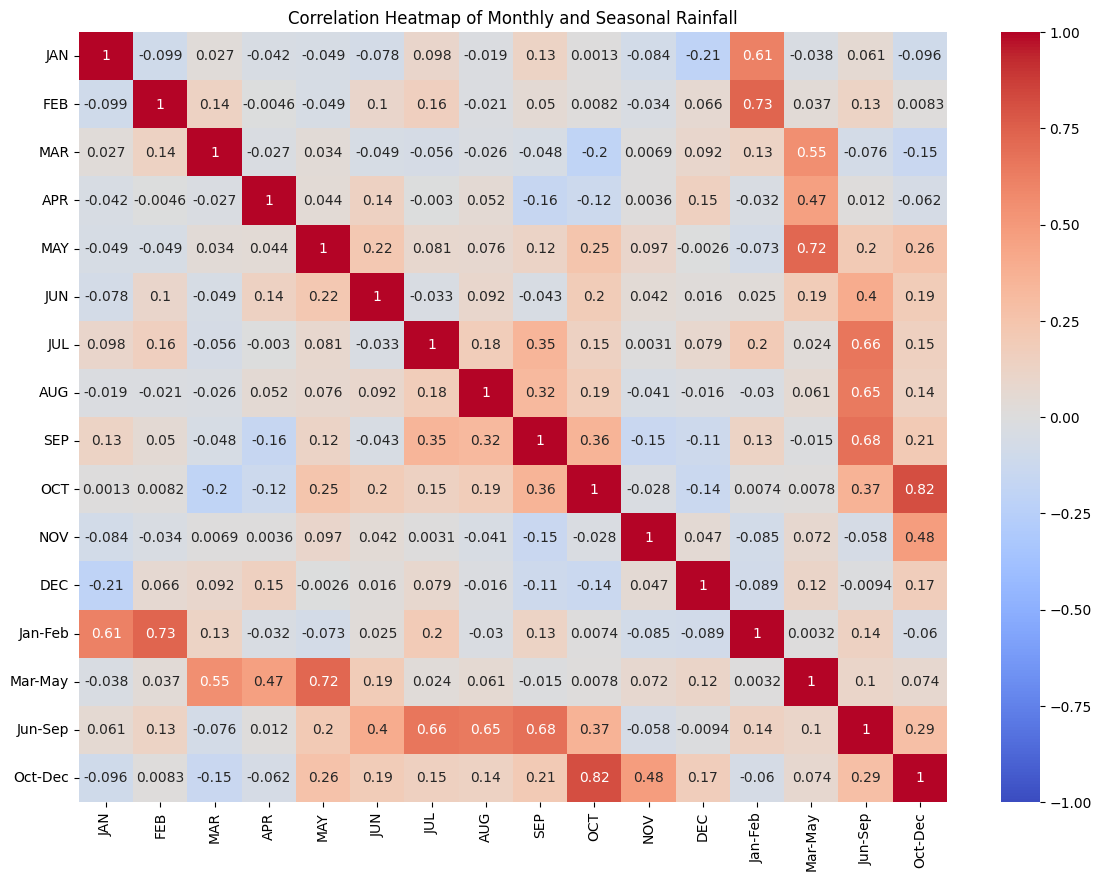

In [17]:
# Selecting monthly and seasonal columns
columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
           'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
correlation_matrix = dataset[columns].corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Monthly and Seasonal Rainfall')
plt.show()

#### How the distribution of annual rainfall changed over time?

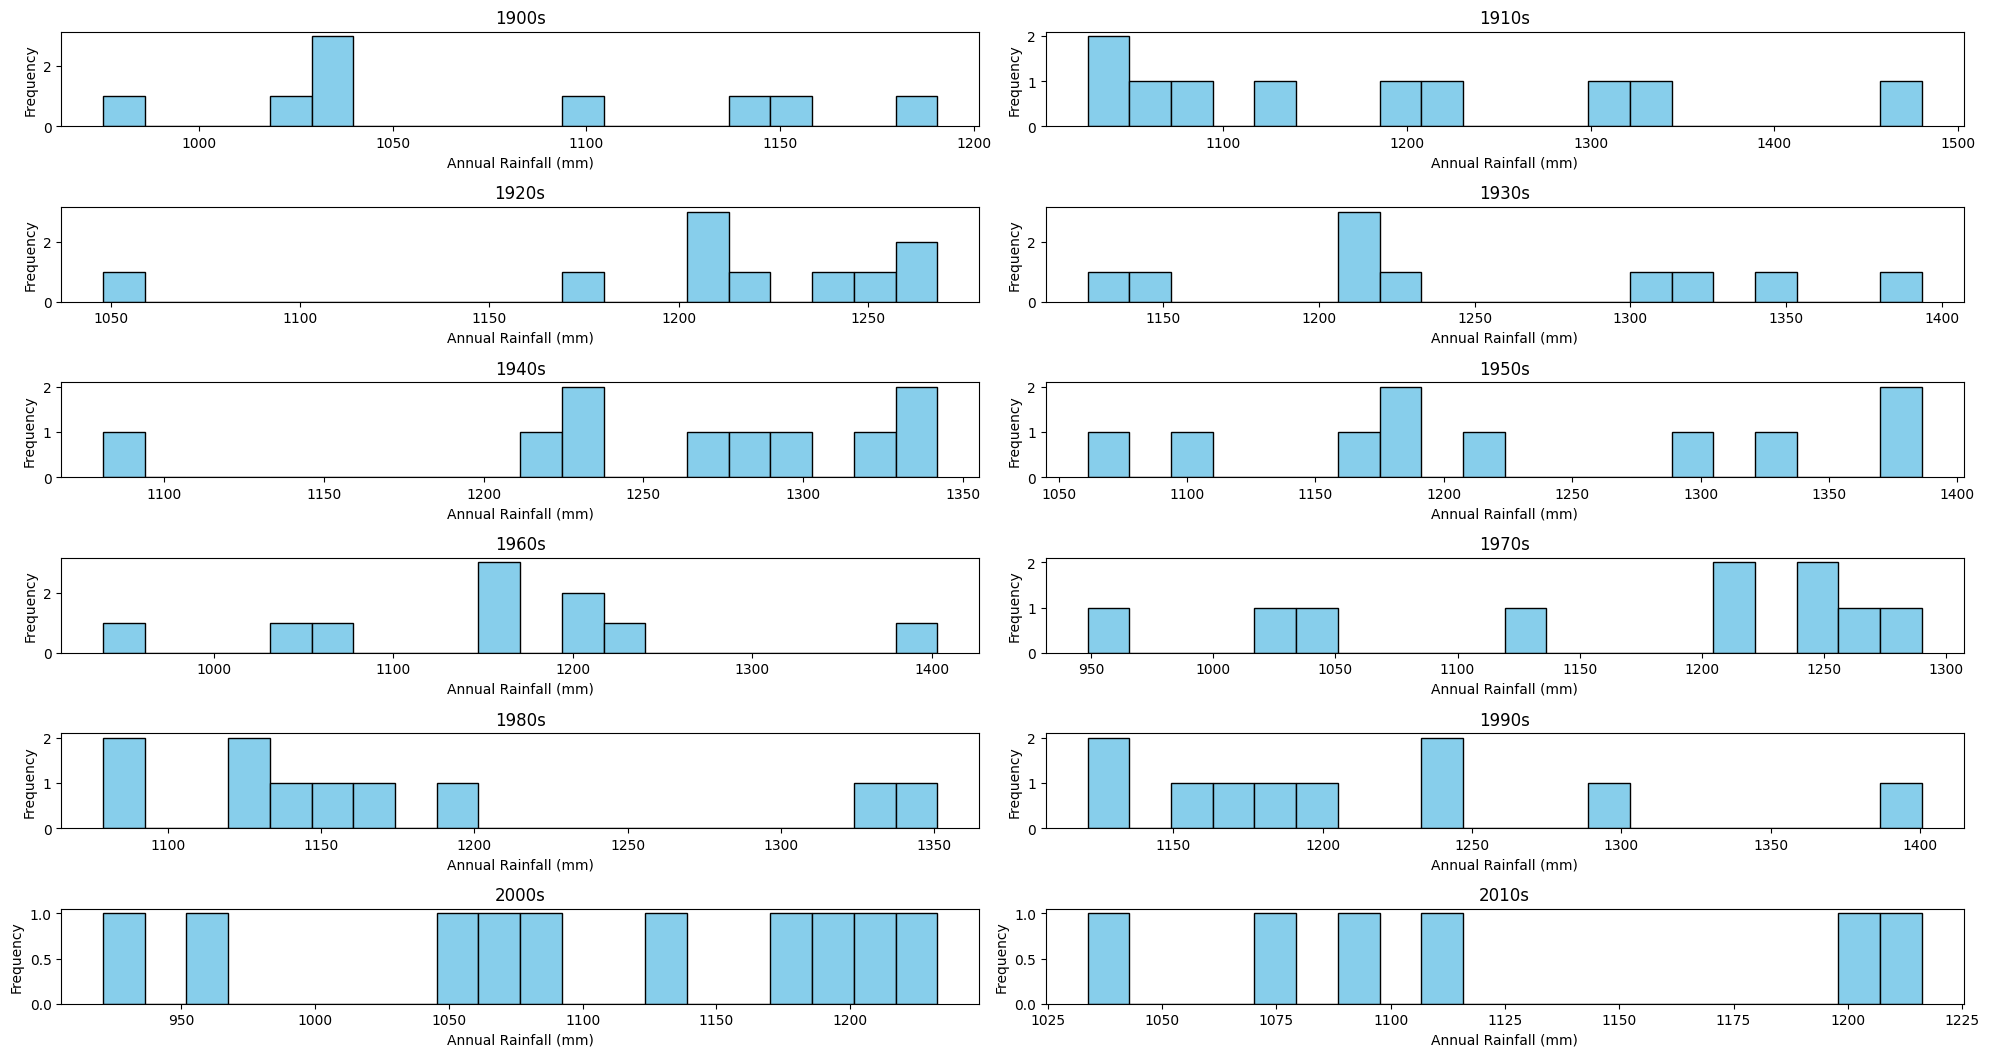

In [23]:
# Adding a new column for decades
dataset['DECADE'] = (dataset['YEAR'] // 10) * 10

# Plotting histograms for each decade
decades = dataset['DECADE'].unique()

plt.figure(figsize=(20, 12))

for i, decade in enumerate(sorted(decades)):
    plt.subplot(len(decades) // 2 + 1, 2, i + 1)
    subset = dataset[dataset['DECADE'] == decade]
    plt.hist(subset['ANNUAL'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{decade}s')
    plt.xlabel('Annual Rainfall (mm)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Categorizing years into 3 different categories

Grouping years based on rainfall patterns into 'Dry', 'Wet' and 'Normal'. (A **clustering** task)

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Preparing data for K-Means Clustering
rainfall_features = dataset[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

Standardizing the rainfall features to have a mean of 0 and a standard deviation of 1. This is important for K-means clustering as it ensures that all features contribute equally to the distance calculations.

In [29]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

**kmeans.fit_predict(scaled_features)** is used to fit the K-means model to the data and simultaneously predict the cluster labels for each sample.  
This is a convenience method that combines **fit()** and **predict()** in one step.

In [30]:
# Map Cluster Labels to categories (Dry, Normal, Wet)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
dataset['Rainfall_Cluster'] = dataset['Rainfall_Cluster'].map(cluster_labels)

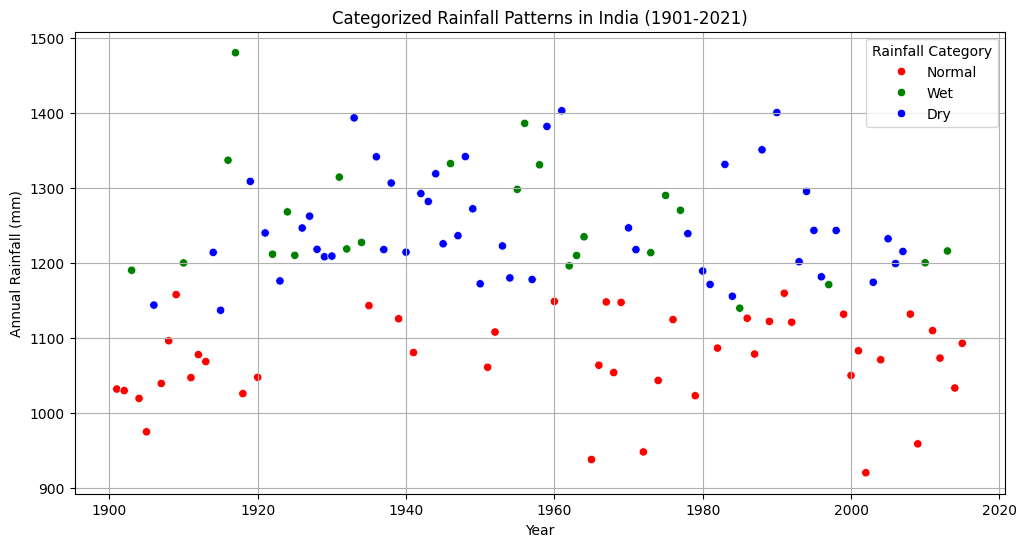

In [32]:
# Visualizing the clusters
# Plotting the categorized data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x='YEAR', y='ANNUAL', hue='Rainfall_Cluster', palette=['red', 'green', 'blue'])
plt.title('Categorized Rainfall Patterns in India (1901-2021)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(title='Rainfall Category')
plt.grid(True)
plt.show()


> The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are sporadically distributed throughout the timeline, with a concentration in the early and mid-20th century. Dry years (below-normal rainfall) are more frequent in the latter half of the timeline, which indicates a potential shift in rainfall patterns over time. This clustering emphasizes the variability and potential long-term changes in India’s rainfall dynamics.